In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
functions = [
    lambda : np.random.randn(),
    lambda : np.random.randn()+2,
    lambda : np.random.randn()+3,
    lambda : np.random.randn()+4,
    lambda : np.random.randn()+5,
    lambda : np.random.randint(0,10)
]

In [ ]:
class UCB:
  def __init__(self, n_arm, reward_func, c=1.414):  #n is number of arms
    self.n_arm = n_arm                  
    self.arm_avg = np.zeros(n_arm)                  #sample mean reward for nth arm
    self.arm_pick = np.ones(n_arm)                  # number of times each arm has been picked
    self.c = c
    self.rounds = 0                                 # total number of rounds played till now
    self.reward_func = reward_func                  # list of reward functions
    self.rews = []                                  # history of all rewards obtained

  def initialise(self):                             #playing each arm once
    self.arm_avg = np.array([i() for i in self.reward_func])

  def best_arm(self):
    return np.argmax(self.arm_avg + self.c * (np.array([np.log(self.rounds)])/self.arm_pick)**0.5)

  def update(self,rounds):
    self.rounds += rounds
    for i in range(rounds):
      arm = self.best_arm()
      reward = self.reward_func[arm]()
      num = ( self.arm_avg[arm] * self.arm_pick[arm] + reward )
      denom = (self.arm_pick[arm] + 1.0)
      self.arm_avg[arm] = num / denom
      self.arm_pick[arm] += 1
      self.rews.append(reward)

  def plotter(self):
    rews = np.cumsum(self.rews).astype(float)
    for i in range(len(rews)):
      rews[i] = rews[i]/(i+1.0)
    plt.plot(range(1,len(rews)+1),rews)

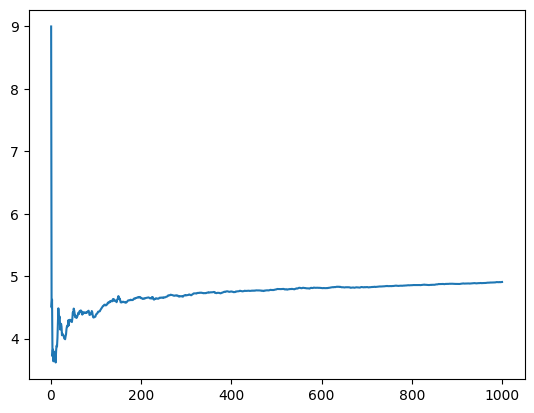

In [4]:
obj = UCB(6,functions,2.5)
obj.initialise()
obj.update(1000)
obj.plotter()